In [106]:
#importing different python packages to perform

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [68]:
#training a dataset
df_test = pd.read_csv("ALS_TestingData_78.csv")

In [69]:
df_test

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,...,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,...,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,...,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,...,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,...,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,96,45.000000,42.0,39.5,37,0.010823,-0.683521,33,28.0,23,...,5,0.004329,6.0,5.50,5.0,0.002165,12.45,8.370,5.56,0.014913
74,97,47.709589,47.0,44.0,41,0.005381,-0.324733,26,19.0,11,...,0,0.005381,7.5,6.00,5.5,0.001845,13.92,10.265,8.37,0.004978
75,98,59.928767,47.0,44.0,40,0.009333,-0.330616,33,24.0,10,...,1,0.008000,7.5,6.50,6.0,0.002000,16.69,5.445,4.48,0.016280
76,99,61.000000,42.0,39.0,38,0.007843,-0.439230,37,33.0,31,...,4,0.005882,6.5,6.00,5.5,0.001961,10.66,7.390,5.81,0.009510


In [70]:
df_train = pd.read_csv("ALS_TrainingData_2223.csv")

In [71]:
df_train

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.00,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.00,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.00,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.00,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.00,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2419,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,...,136.0,0.014035,997136,7,5.0,5,0.003643,7.00,6.0,5.0
2219,2420,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,...,141.0,0.009074,998047,5,4.0,3,0.003630,7.41,5.5,5.0
2220,2421,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,...,135.0,0.013123,998773,5,4.0,4,0.001825,9.00,6.0,5.0
2221,2422,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,...,136.0,0.007143,998908,8,4.5,2,0.010714,6.00,5.0,5.0


In [72]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Columns: 131 entries, ID to White.Blood.Cell..WBC._range
dtypes: float64(92), int64(39)
memory usage: 80.0 KB


In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB


In [74]:
df_test.isnull()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
75,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
df_train.isnull()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2219,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2220,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2221,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
df_test.isnull().sum()

ID                               0
Age_mean                         0
Albumin_max                      0
Albumin_median                   0
Albumin_min                      0
                                ..
Urine.Ph_range                   0
White.Blood.Cell..WBC._max       0
White.Blood.Cell..WBC._median    0
White.Blood.Cell..WBC._min       0
White.Blood.Cell..WBC._range     0
Length: 131, dtype: int64

In [77]:
df_train.isnull().sum()

ID                 0
Age_mean           0
Albumin_max        0
Albumin_median     0
Albumin_min        0
                  ..
trunk_min          0
trunk_range        0
Urine.Ph_max       0
Urine.Ph_median    0
Urine.Ph_min       0
Length: 101, dtype: int64

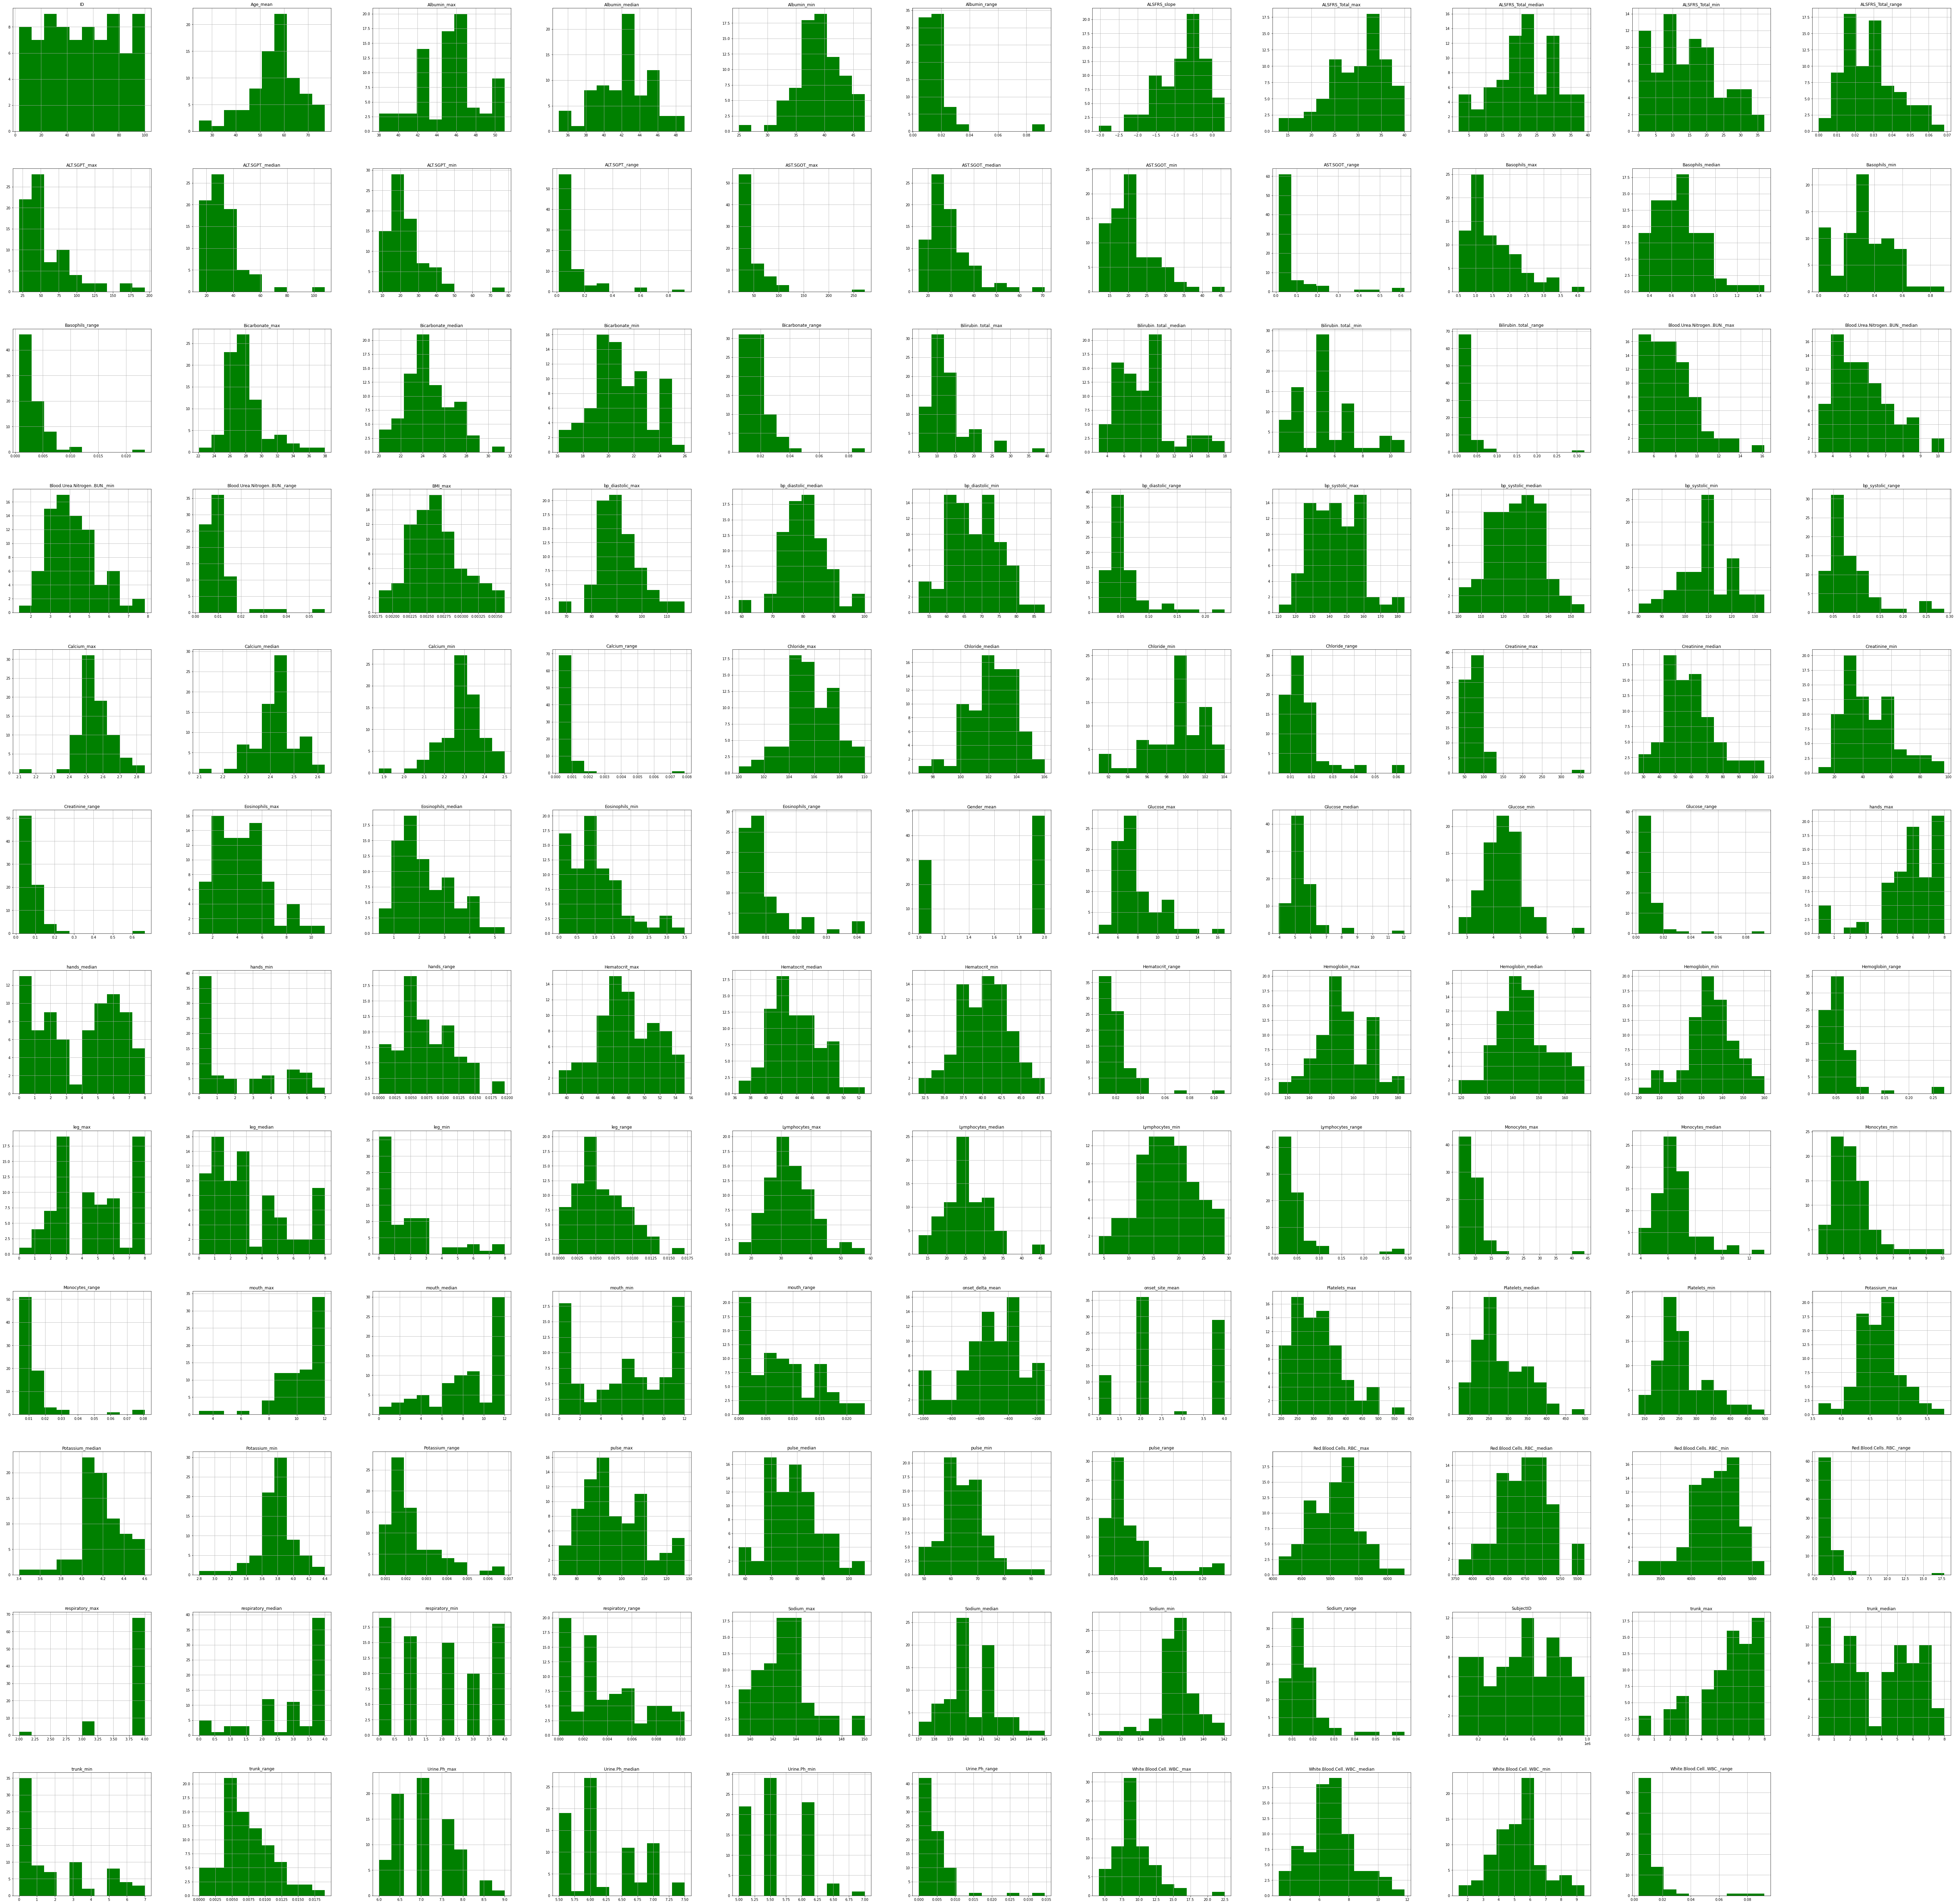

In [78]:
#Checking the distrubution of variables
hist_plot = df_test.hist(figsize=(100,100),color="green")

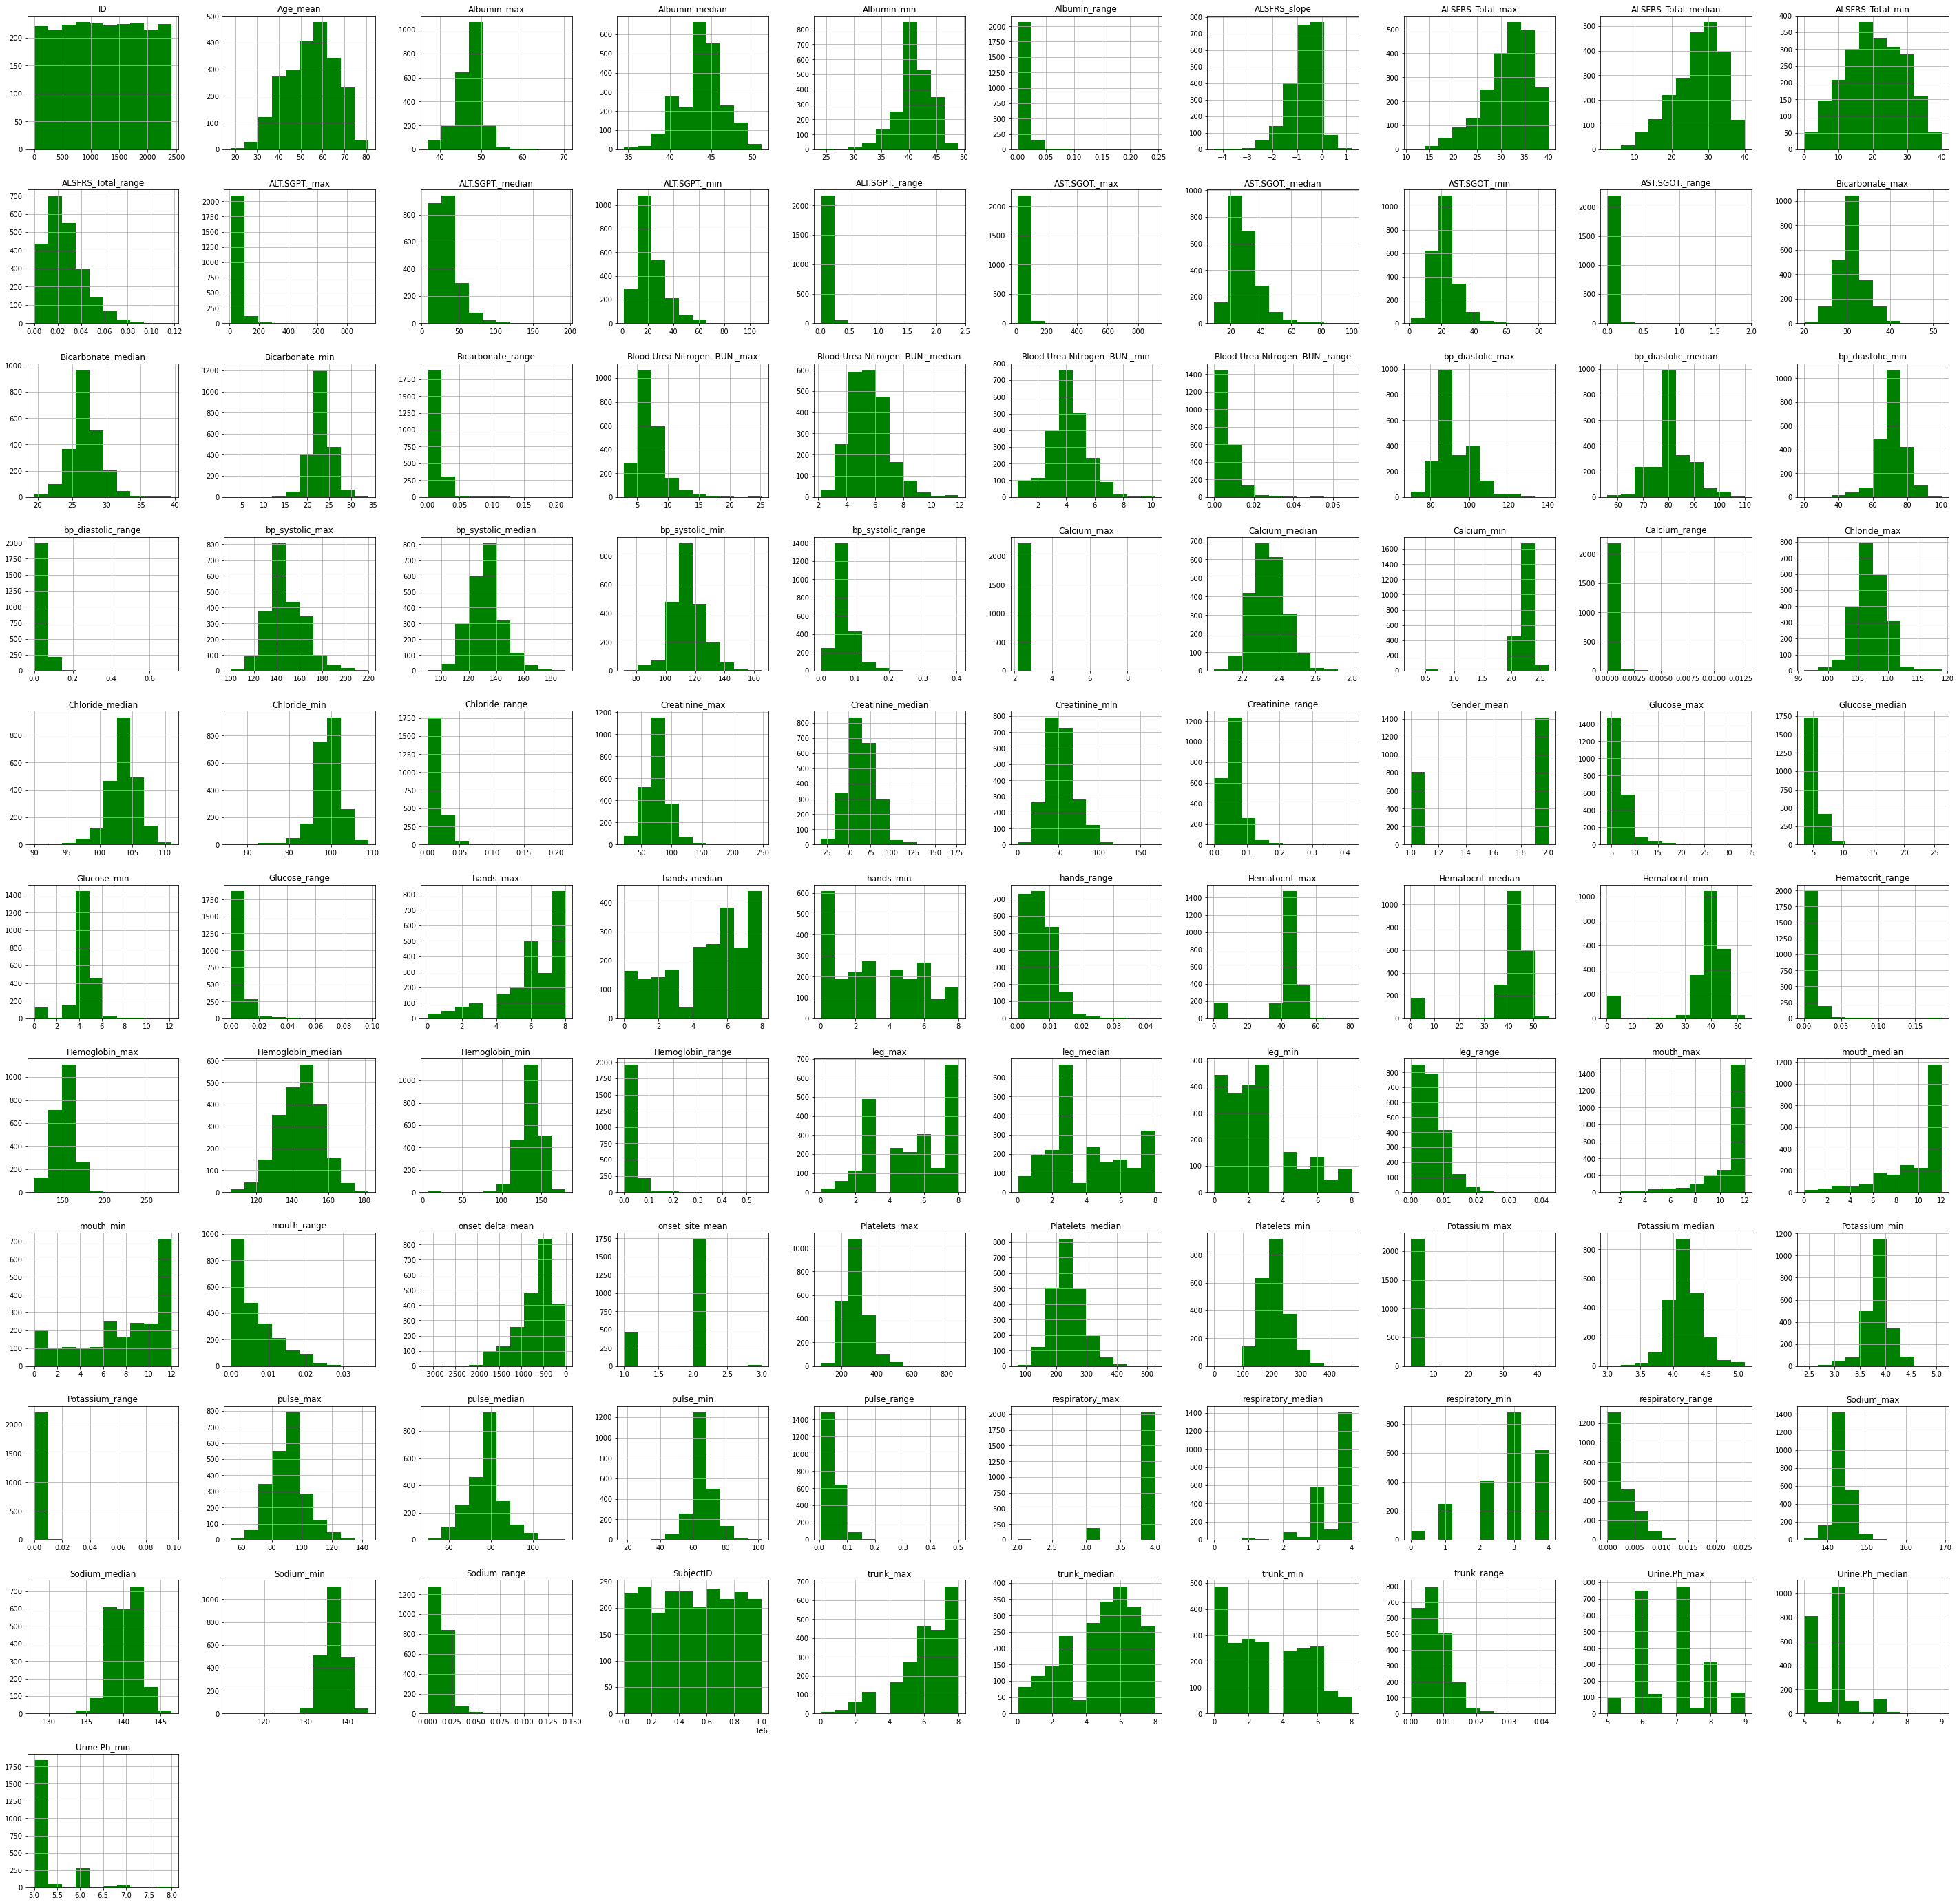

In [79]:
#Checking the distrubution of variables
hist_plot = df_train.hist(figsize=(50,50),color="green")

In [80]:
# skewness along the index axis
df_test.skew(axis = 0, skipna = True)

ID                               0.035929
Age_mean                        -0.767872
Albumin_max                     -0.127393
Albumin_median                  -0.176382
Albumin_min                     -0.549516
                                   ...   
Urine.Ph_range                   4.326142
White.Blood.Cell..WBC._max       1.531686
White.Blood.Cell..WBC._median    0.386964
White.Blood.Cell..WBC._min       0.242830
White.Blood.Cell..WBC._range     4.028221
Length: 131, dtype: float64

In [81]:
# skewness along the index axis
df_train.skew(axis = 0, skipna = True)

ID                -0.003914
Age_mean          -0.262090
Albumin_max        0.519963
Albumin_median    -0.288895
Albumin_min       -0.781931
                     ...   
trunk_min          0.308773
trunk_range        1.079520
Urine.Ph_max       0.498955
Urine.Ph_median    0.476166
Urine.Ph_min       2.520826
Length: 101, dtype: float64

<AxesSubplot:>

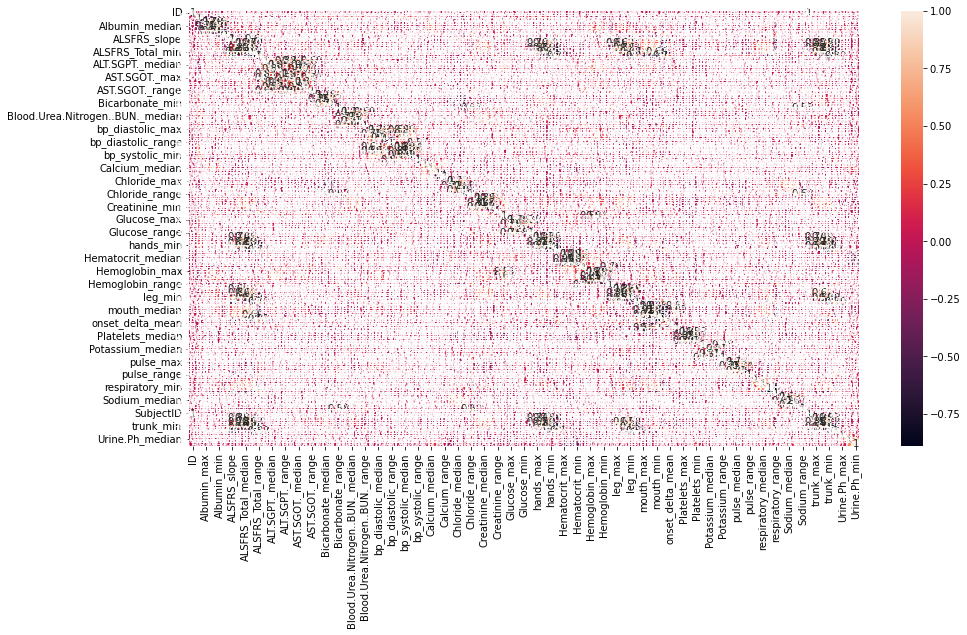

In [82]:
# Finding correlation between the variables
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df_train.corr(), annot=True)

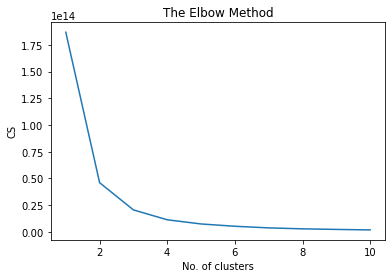

In [83]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_train)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('CS')
plt.show()

In [84]:
#we can see above graph maximum accuracy occurs from k=2 to k=4

In [85]:
# Building model using k values
def Kmeansmodel(X, n_neighbors):
    kmeans_model = KMeans(n_neighbors)
    kmeans_model.fit(X)
    clust_labels = kmeans_model.predict(X)
    cent = kmeans_model.cluster_centers_
    return (clust_labels, cent)

In [96]:
# K=2
clabels_1, cent_1 = Kmeansmodel(X_train, 2)
k1 = pd.DataFrame(clabels_1)
k1

,0
0,0
1,0
2,0
3,0
4,0
...,...
2218,1
2219,1
2220,1
2221,1


In [97]:
# K=3
clabels_2, cent_2 = Kmeansmodel(df_train, 3)
k2 = pd.DataFrame(clabels_2)
k2

,0
0,0
1,0
2,0
3,0
4,0
...,...
2218,1
2219,1
2220,1
2221,1


In [98]:
# K=4
clabels_3, cent_3 = Kmeansmodel(X_train, 4)
k3 = pd.DataFrame(clabels_3)
k3

,0
0,2
1,2
2,2
3,2
4,2
...,...
2218,0
2219,0
2220,0
2221,0


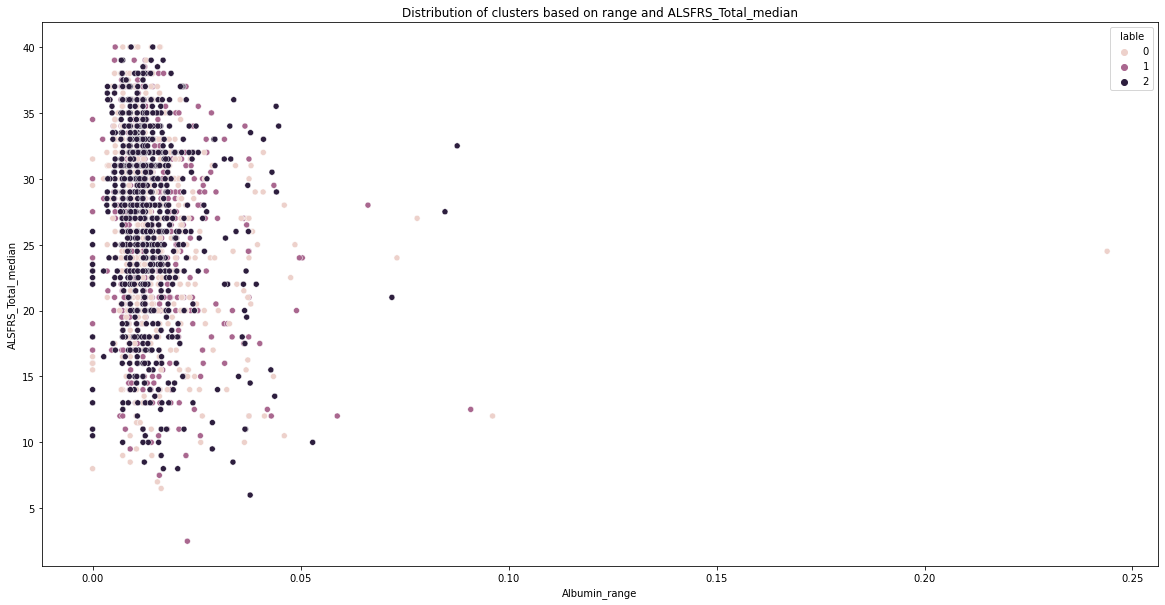

In [110]:
#clustering with any two features at a time

# 1. Distribution of clusters 

plt.figure(figsize=(20,10))
sns.scatterplot(data=df_train, x='Albumin_range', y='ALSFRS_Total_median', hue='lable')
plt.title('Distribution of clusters based on range and ALSFRS_Total_median')
plt.show()

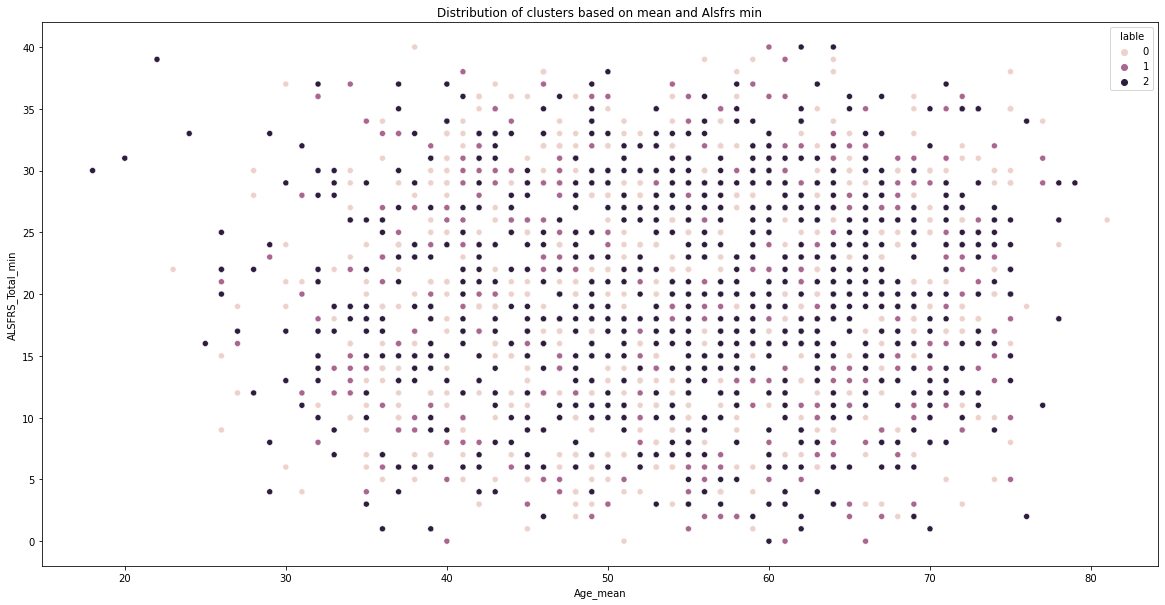

In [105]:
# 2. Distribution of clusters

plt.figure(figsize=(20,10))
sns.scatterplot(data=df_train, x='Age_mean', y='ALSFRS_Total_min', hue='lable')
plt.title('Distribution of clusters based on mean and Alsfrs min')
plt.show()

In [107]:
from sklearn.metrics import silhouette_score

# For k=2

kmeans = KMeans(n_clusters=2, random_state=0).fit(df_train)

print('silhoutte score of our model is ' + str(silhouette_score(df_train, kmeans.labels_)))

silhoutte score of our model is 0.6303941572776885


In [108]:
# For K=3

kmeans = KMeans(n_clusters=3,random_state=0).fit(df_train)

print('silhoutte score of our model is ' + str(silhouette_score(df_train, kmeans.labels_)))

silhoutte score of our model is 0.5909974553698797


In [109]:
# For K=4

kmeans = KMeans(n_clusters=4, random_state=0).fit(df_train)

print('silhoutte score of our model is ' + str(silhouette_score(df_train, kmeans.labels_)))

silhoutte score of our model is 0.5792586793059967
